Queremos hacer un modelo de machine learning que podamos obtener la posibilidad de un niño de tener miopia dependiendo de diferentes parametros

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV

In [4]:
data_myopia = pd.read_csv("../Data/Data_main/myopia.csv", sep=";")

In [10]:
data_myopia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               618 non-null    int64  
 1   Año de estudio                   618 non-null    int64  
 2   Miopía                           618 non-null    int64  
 3   Edad                             618 non-null    int64  
 4   Género                           618 non-null    int64  
 5   Refracción Equivalente esférico  618 non-null    float64
 6   Longitud axial                   618 non-null    float64
 7   Profundidad camara anterior      618 non-null    float64
 8   Espesor cristalino               618 non-null    float64
 9   Profundidad camara vitreo        618 non-null    float64
 10  Horas deporte                    618 non-null    int64  
 11  Horas lectura                    618 non-null    int64  
 12  Horas ordenador       

In [5]:
data_myopia.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [7]:
data_myopia.rename(columns={"STUDYYEAR":"Año de estudio",
                            "MYOPIC":"Miopía",
                            "AGE":"Edad",
                            "GENDER":"Género",
                            "SPHEQ" : "Refracción Equivalente esférico",
                            "AL":"Longitud axial",
                            "ACD":"Profundidad camara anterior",
                            "LT": "Espesor cristalino",
                            "VCD" : "Profundidad camara vitreo",
                            "SPORTHR" : "Horas deporte",
                            "READHR" : "Horas lectura",
                            "COMPHR" : "Horas ordenador",
                            "STUDYHR" : "Horas estudio",
                            "TVHR" : "Horas TV",
                            "DIOPTERHR": "Horas actividades cerca",
                            "MOMMY" : "Miopía Madre",
                            "DADMY":"Miopía Padre"},inplace=True)

In [8]:
data_myopia.head()

,ID,Año de estudio,Miopía,Edad,Género,Refracción Equivalente esférico,Longitud axial,Profundidad camara anterior,Espesor cristalino,Profundidad camara vitreo,Horas deporte,Horas lectura,Horas ordenador,Horas estudio,Horas TV,Horas actividades cerca,Miopía Madre,Miopía Padre
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [9]:
data_myopia["Miopía"].value_counts()

Miopía
0    537
1     81
Name: count, dtype: int64

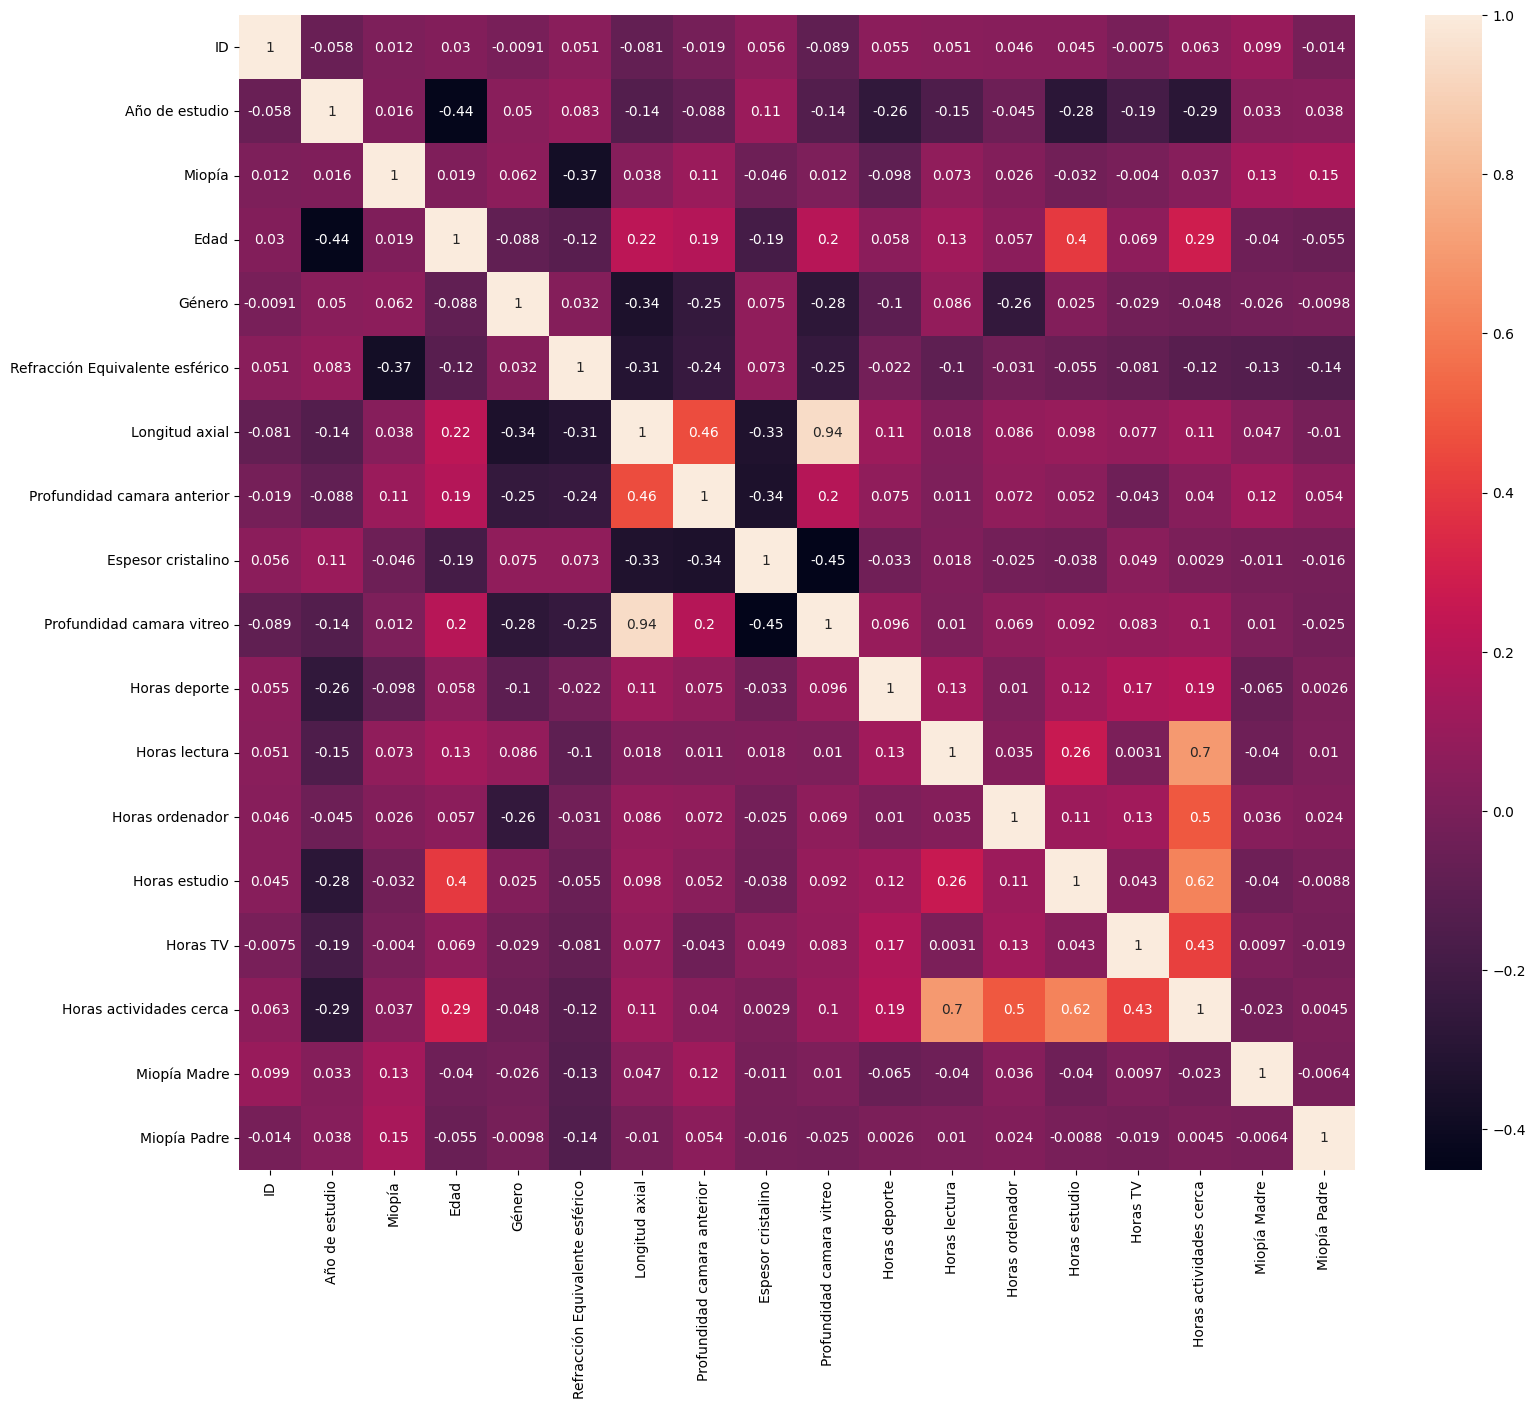

In [16]:
plt.figure(figsize=(18,15))
sns.heatmap(data_myopia.corr(),annot=True);

Primero lo haremos sin hacer undersampling

In [69]:
X = data_myopia.drop(["Miopía"],axis=1)
y = data_myopia[["Miopía"]]

In [70]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.20,random_state=5)

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [73]:
import xgboost
gbm_param_grid = {"n_estimators" :[100,150,200],
                  "max_depth":range(1,20),
                  "learning_rate":[.1,.4,.45,.5,.55,.6,],
                  "colsample_bytree":[.6,.7,.8,.9,1]
}
xgb_class = xgboost.XGBClassifier()
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid,
                                estimator=xgb_class,scoring="recall",
                                verbose = 0,
                                n_iter=100,
                                cv = 5)

In [74]:
xgb_random.fit(X_train_scal,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1],
                                        'learning_rate': [0.1, 0.4, 0.45, 0.5,
                                                          0.55, 0.6],
                                        'max_depth': range(1, 20),
                                        'n_estimators': [100, 150, 200]},
                   scoring='recall')

In [75]:
y_pred = xgb_random.predict(X_test_scal)
c_mat = confusion_matrix(y_test, y_pred)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Roc_auc_score: ", roc_auc_score(y_test, y_pred))
print("Recall_score: ", recall_score(y_test, y_pred))
print("Precision_score: ", precision_score(y_test, y_pred))

Accuracy Score:  0.7983870967741935
Roc_auc_score:  0.5747474747474748
Recall_score:  0.2
Precision_score:  0.5


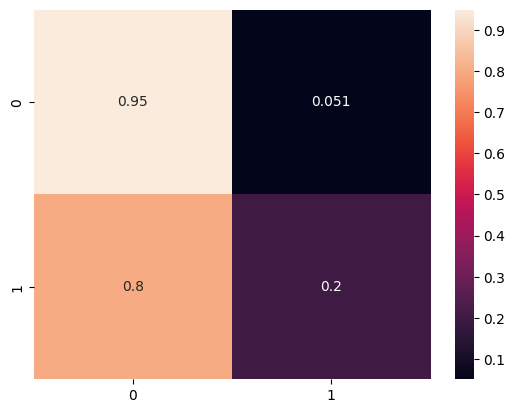

In [76]:
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True);

Los valores que obtenemos de verdaderos positivos son bastante erroneos , queremos dar más importancia a una persona miope que otra que no lo es, por tanto haremos undersampling para comprobar si equilibramos la miopía podremos obtener mejores resultados con la gente que es miope y los detecta como miopes.

Vemos con undersampling

In [77]:
X = data_myopia.drop(["Miopía"],axis=1)
y = data_myopia[["Miopía"]]

In [78]:
# Tenemos preparado el undersampling para ver si realmente afecta en la predicción.
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X, y)

Comprobamos que el problema esta balanceado y hacemos predicciones con ello.

In [79]:
y_resampled["Miopía"].value_counts()

Miopía
0    81
1    81
Name: count, dtype: int64

In [80]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_resampled,y_resampled,test_size=0.20,random_state=5)

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [82]:
import xgboost
gbm_param_grid = {"n_estimators" :[100,150,200],
                  "max_depth":range(1,20),
                  "learning_rate":[.1,.4,.45,.5,.55,.6,],
                  "colsample_bytree":[.6,.7,.8,.9,1]
}
xgb_class = xgboost.XGBClassifier()
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid,
                                estimator=xgb_class,scoring="recall",
                                verbose = 0,
                                n_iter=100,
                                cv = 5)

In [83]:
xgb_random.fit(X_train_scal,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1],
                                        'learning_rate': [0.1, 0.4, 0.45, 0.5,
                                                          0.55, 0.6],
                                        'max_depth': range(1, 20),
                                        'n_estimators': [100, 150, 200]},
                   scoring='recall')

In [84]:
y_pred = xgb_random.predict(X_test_scal)
c_mat = confusion_matrix(y_test, y_pred)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Roc_auc_score: ", roc_auc_score(y_test, y_pred))
print("Recall_score: ", recall_score(y_test, y_pred))
print("Precision_score: ", precision_score(y_test, y_pred))

Accuracy Score:  0.7575757575757576
Roc_auc_score:  0.7865384615384615
Recall_score:  0.9230769230769231
Precision_score:  0.631578947368421


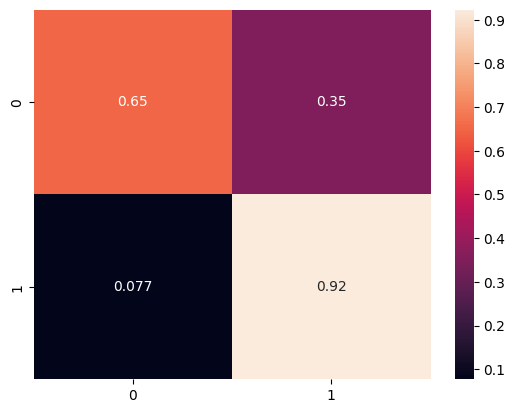

In [85]:
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True);

Tercera forma, compute sample weight

In [108]:
X = data_myopia.drop(["Miopía"],axis=1)
y = data_myopia[["Miopía"]]

In [109]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.20,random_state=5)

In [110]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train[["Miopía"]])


In [111]:
import xgboost
gbm_param_grid = {"n_estimators" :[100,150,200],
                  "max_depth":range(1,20),
                  "learning_rate":[.1,.4,.45,.5,.55,.6,],
                  "colsample_bytree":[.6,.7,.8,.9,1]
}
xgb_class = xgboost.XGBClassifier()
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid,
                                estimator=xgb_class,scoring="recall",
                                verbose = 0,
                                n_iter=100,
                                cv = 5)

In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [113]:
xgb_random.fit(X_train_scal,y_train, sample_weight=sample_weights)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1],
                                        'learning_rate': [0.1, 0.4, 0.45, 0.5,
                                                          0.55, 0.6],
                                        'max_depth': range(1, 20),
                                        'n_estimators': [100, 150, 200]},
                   scoring='recall')

In [114]:
y_pred = xgb_random.predict(X_test_scal)
c_mat = confusion_matrix(y_test, y_pred)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Roc_auc_score: ", roc_auc_score(y_test, y_pred))
print("Recall_score: ", recall_score(y_test, y_pred))
print("Precision_score: ", precision_score(y_test, y_pred))

Accuracy Score:  0.7580645161290323
Roc_auc_score:  0.713939393939394
Recall_score:  0.64
Precision_score:  0.43243243243243246


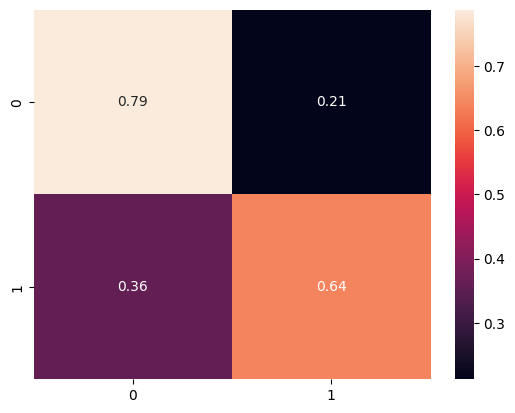

In [115]:
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True);